part a:
Cost w/o battery: 152400
Cost with bathery: 143400.0
Money saved: 9000.0

part b


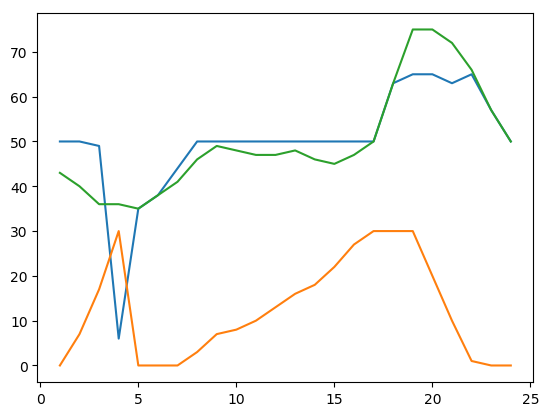

Cost w/o battery: 152400
Cost with battery: 143400.0
Cost with infinite battery: 120000.0
Savings: 32400.0

part c:


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000389E4080>

In [2]:
#Problem 1a.

println("part a:")
d = [ 43, 40, 36, 36, 35, 38, 41, 46, 49, 48, 47, 47, 48, 46, 45, 47, 50, 63, 75, 75, 72, 66, 57, 50]
using JuMP, PyPlot, Clp
m = Model(solver = ClpSolver())
@variable(m, 0 <= x[1:24] <=50)
@variable(m, 0 <= y[1:24] <=25)#excess over 50MWh less than 75
@variable(m, 0 <= b[1:25] <=30)
@constraint(m, a[i = 1:24], x[i] + y[i] + b[i] == d[i] + b[i+1])
@constraint(m, c[i = 1:24], x[i] + y[i] <= 65)
@constraint(m, b[1] == 0)
@objective(m, Min, sum(x)*100 + sum(y)*400)
solve(m)

origin = 0;

for i = 1:24
    if d[i] > 50
        origin +=50*100 + (d[i]-50)*400
    end
    if d[i] <= 50
        origin += d[i]*100
    end
end
println("Cost w/o battery: ", origin)
println("Cost with bathery: ", getobjectivevalue(m))
println("Money saved: ", origin-getobjectivevalue(m))


#Problem 1b.

println()
println("part b")
m2 = Model(solver = ClpSolver())
@variable(m2, 0 <= x1[1:24] <= 50)
@variable(m2, 0 <= y1[1:24] <= 15)
# bounded to 1000 since the charge will never reach 1000
@variable(m2, 0 <= b1[1:25] <= 1000)
@constraint(m2, a1[i = 1:24], x1[i] + y1[i] + b1[i] == d[i] + b1[i+1])
@constraint(m2, c1[i = 1:24], x1[i] + y1[i] <= 65)
@constraint(m2, b1[1] == 0)
@objective(m2, Min, sum(x1)*100 + sum(y1)*400)
solve(m2)
println("Cost w/o battery: ", origin)
println("Cost with battery: ", getobjectivevalue(m))
println("Cost with infinite battery: ", getobjectivevalue(m2))
println("Savings: ", origin - getobjectivevalue(m2))

println()
println("part c:")
z = 1:24
sleep(.03) #so thing print in correct order....
plot(z,getvalue(x)+getvalue(y));
plot(z,getvalue(b[1:24]))
plot(z,d)

In [8]:
#Problem 2b
using NamedArrays, JuMP, Clp

# import Stigler's data set
raw = readcsv("stigler.csv")
(m,n) = size(raw)

n_nutrients = 2:n      # columns containing nutrients
n_foods = 3:m          # rows containing food names

nutrients = raw[1,n_nutrients][:]   # the list of nutrients (convert to 1-D array)
foods = raw[n_foods,1][:]           # the list of foods (convert to 1-D array)

# lower[i] is the minimum daily requirement of nutrient i.
lower = Dict( zip(nutrients,raw[2,n_nutrients]) )

# data[f,i] is the amount of nutrient i contained in food f.
data = NamedArray( raw[n_foods,n_nutrients], (foods,nutrients), ("foods","nutrients") );

#println(data)
m = Model(solver = ClpSolver())
@variable(m, x[foods] >= 0)
@constraint(m, a[j in nutrients],
    sum(x[i]*data[i,j] for i in foods) >= lower[j])
@objective(m, Min, sum(x[i] for i in foods))


#print(m);

status = solve(m);

println("The minimized cost diet costs: ", getobjectivevalue(m)*365);
println("This optimal diet is ", 39.66173154546625 - getobjectivevalue(m)*365,
    " cents cheaper than my original diet without the calcium supplement")
println("The diet is made up of:")
for i in foods
    if getvalue(x[i]) > 0
        println(getvalue(x[i]), "units of ", i)
    end
end


The minimized cost diet costs: 32.464450056809504
This optimal diet is 7.197281488656749 cents cheaper than my original diet without the calcium supplement
The diet is made up of:
0.06598060307911849units of Wheat Flour (Enriched)
0.007844338921201132units of Liver (Beef)
0.011195027632464832units of Cabbage
0.003911295356684475units of Spinach
1.2433796310553273e-5units of Calcium Supplement


In [66]:
using JuMP, Clp

#Problem 3
function go(t)
    m = Model(solver = ClpSolver())
    @variable(m, p)
    @variable(m, q)
    @variable(m, r)
    @variable(m, s)
    @constraint(m, p - r == cos(t))
    @constraint(m, q - s == sin(t))
    @constraint(m, p >= 0)
    @constraint(m, q >= 0)
    @constraint(m, r >= 0)
    @constraint(m, s >= 0)
    @objective(m, Min, p + q + r + s)
    solve(m)
    return getobjectivevalue(m)
end

#using Plots
#p = plot(0)
#anim = begin
    anim = Animation()
    t = 0;
    while t <=2pi
        t = t +.1
        #frame(anim)
 #       push!(p, t, go(t))
        println(go(t))
    end
#end
#gif(anim)


1.094837581924854
1.1787359086363027
1.2508566957869456
1.3104793363115357
1.3570081004945758
1.3899780883047137
1.4090598745221796
1.4140628002466882
1.4049368778981477
1.381773290676036
1.3448034814870127
1.2943968404439
1.2310570140417803
1.155416872888701
1.0682321882717571
1.028773125342794
1.1205093047479937
1.2010497255712826
1.2695896545509182
1.3254442633728243
1.3680554712487314
1.3969975210749361
1.4119812334565445
1.4128568960923964
1.39961575965089
1.3723901251904111
1.3314520222508905
1.2772104908245623
1.210207494363572
1.1311125046603117
1.0407158127065685
1.0566689192223344
1.1452254640521147
1.2223392946062934
1.2872399149804172
1.3392788596290002
1.3779361726189019
1.4028256028571362
1.4136984633841139
1.41044611617154
1.3931010575976792
1.3618365937542873
1.3169651088294299
1.2589349438679354
1.1883259170958766
1.1058435305685193
1.0123119210269922
1.0836635922752862
1.1689649820469068
1.2425864601263636
1.3037924250407116
1.3519713270205291
1.3866417784030611
1.407

LoadError: [91mcould not spawn `ffmpeg -v 0 -i 'C:\Users\Nick\DOCUME~1\MobaXterm\slash\var\log\xwin\jl_6AA.tmp/%06d.png' -vf palettegen=stats_mode=diff -y 'C:\Users\Nick\DOCUME~1\MobaXterm\slash\var\log\xwin\jl_6AA.tmp/palette.bmp'`: no such file or directory (ENOENT)[39m